#**BUSINESS UNDERSTANDING**

##**Business Objective**

Perusahaan telekomunikasi menghadapi tantangan dalam mempertahankan pelanggan karena tingginya tingkat churn, yaitu kondisi ketika pelanggan berhenti berlangganan layanan akibat promosi yang tidak tepat sasaran dan kurangnya pemahaman terhadap kebutuhan pelanggan. Hal ini berdampak pada turunnya loyalitas pelanggan serta potensi kerugian finansial bagi perusahaan.

Proyek InsightTel: Smart Product Recommendations for Smarter Connections bertujuan untuk mengembangkan sistem berbasis machine learning yang dapat memprediksi pelanggan berisiko churn sekaligus memberikan rekomendasi produk yang lebih relevan dan personal. Dengan sistem ini, perusahaan dapat menargetkan promosi dengan lebih efisien, meningkatkan loyalitas pelanggan, dan mengoptimalkan pendapatan melalui strategi pemasaran yang berbasis data.

##**Assess Situation**

Saat ini, perusahaan telekomunikasi masih menghadapi kesulitan dalam memahami karakteristik pelanggan dan kecenderungan mereka terhadap produk tertentu. Pendekatan pemasaran yang digunakan masih bersifat umum dan tidak mempertimbangkan preferensi individu pelanggan. Akibatnya, banyak pelanggan yang merasa kurang puas dengan layanan yang ditawarkan dan memutuskan untuk berhenti berlangganan.
Selain itu, belum adanya sistem analisis perilaku pelanggan yang terintegrasi menyebabkan perusahaan sulit untuk mengetahui pola konsumsi layanan secara real-time. Oleh karena itu, dibutuhkan sistem cerdas yang mampu menganalisis data pelanggan secara otomatis, mengidentifikasi pelanggan yang berisiko churn, serta merekomendasikan produk yang sesuai dengan preferensi mereka.

##**Data Mining Goals**


Tujuan utama dari penerapan data mining dalam proyek InsightTel adalah untuk menemukan pola perilaku pelanggan yang dapat digunakan untuk meningkatkan retensi dan penjualan. Secara khusus, proyek ini bertujuan untuk:

- Memprediksi pelanggan yang berpotensi churn menggunakan model machine learning berbasis data historis pelanggan.

- Menghasilkan rekomendasi produk yang personal sesuai dengan preferensi dan riwayat penggunaan pelanggan.

- Menyediakan insight berbasis data yang membantu perusahaan memahami tren konsumsi pelanggan dan melakukan pengambilan keputusan yang lebih tepat.
Melalui penerapan data mining ini, perusahaan dapat meningkatkan efektivitas promosi dan menciptakan pengalaman pelanggan yang lebih baik.

##**Project Plan**

Proyek InsightTel dilaksanakan berdasarkan metodologi CRISP-DM, dimulai dari tahap pemahaman bisnis hingga penerapan model ke sistem digital.
Langkah-langkah utama proyek meliputi:

1. Business Understanding: Mengidentifikasi permasalahan churn dan menentukan tujuan bisnis yang ingin dicapai.

2. Data Understanding & Preparation: Mengumpulkan dan membersihkan data pelanggan dari dataset Telco Customer Churn, kemudian melakukan analisis eksploratif untuk menemukan pola penting.

3. Modeling & Evaluation: Mengembangkan model machine learning untuk prediksi churn dan rekomendasi produk, serta mengevaluasi kinerjanya dengan berbagai metrik.

4. Deployment: Mengintegrasikan model ke dalam sistem backend (FastAPI) dan frontend website (React) untuk menampilkan hasil analisis dan rekomendasi secara interaktif.

Dengan tahapan tersebut, proyek InsightTel diharapkan mampu memberikan solusi strategis berbasis data yang membantu perusahaan meningkatkan loyalitas pelanggan dan efisiensi pemasaran.

#**DATA UNDERSTANDING**

### **Import Library**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Collect Initial Data**

In [125]:
url = 'https://raw.githubusercontent.com/InsightTel/InsightTel_Model/main/ac-01_telco_customer_behavior_data%20.csv'

In [126]:
df = pd.read_csv(url)
df.head()

,"""customer_id",plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,"target_offer"""
0,"""C00001",Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0,"General Offer"""
1,"""C00002",Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0,"General Offer"""
2,"""C00003",Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0,"General Offer"""
3,"""C00004",Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0,"General Offer"""
4,"""C00005",Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0,"General Offer"""


In [127]:
df.columns = [col.strip().replace('"', '') for col in df.columns]
if 'customer_id' in df.columns:
    df['customer_id'] = df['customer_id'].str.replace('"', '', regex=False)
if 'target_offer' in df.columns:
    df['target_offer'] = df['target_offer'].str.replace('"', '', regex=False)

###**Describe Data**


**Informasi Dasar**

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   plan_type          10000 non-null  object 
 2   device_brand       10000 non-null  object 
 3   avg_data_usage_gb  10000 non-null  float64
 4   pct_video_usage    10000 non-null  float64
 5   avg_call_duration  10000 non-null  float64
 6   sms_freq           10000 non-null  int64  
 7   monthly_spend      10000 non-null  float64
 8   topup_freq         10000 non-null  int64  
 9   travel_score       10000 non-null  float64
 10  complaint_count    10000 non-null  int64  
 11  target_offer       10000 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


 **Informasi Lanjutan**

In [129]:
df.describe()

,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.958883,0.402639,9.971357,15.010800,109776.500000,2.986600,0.282441,0.492600
std,4.192909,0.195741,4.954993,3.872775,46237.321903,1.709828,0.158366,0.704127
min,0.030000,0.000000,-8.370000,4.000000,-13000.000000,0.000000,0.003376,0.000000
25%,2.870000,0.265290,6.650000,12.000000,78000.000000,2.000000,0.158775,0.000000
50%,4.990000,0.400116,10.020000,15.000000,102000.000000,3.000000,0.261206,0.000000
75%,8.040000,0.535161,13.320000,18.000000,135000.000000,4.000000,0.385656,1.000000
max,39.020000,1.000000,27.770000,31.000000,450000.000000,12.000000,0.854814,5.000000


###**Exploratory Data Analysis**

**Distribution**

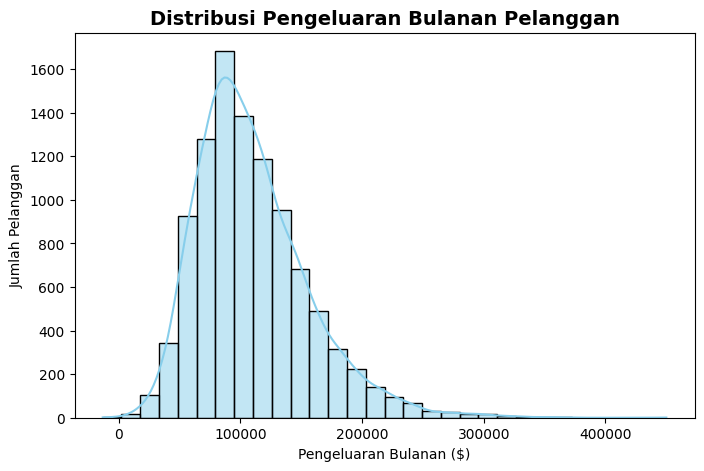

In [130]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='monthly_spend', bins=30, kde=True, color='skyblue')
plt.title('Distribusi Pengeluaran Bulanan Pelanggan', fontsize=14, fontweight='bold')
plt.xlabel('Pengeluaran Bulanan ($)')
plt.ylabel('Jumlah Pelanggan')
plt.show()



Pada grafik distribusi monthly spend terlihat bahwa sebagian besar pelanggan berada pada rentang pengeluaran yang relatif rendah hingga menengah. Puncak distribusi menunjukkan bahwa mayoritas pelanggan menghabiskan biaya dalam kisaran tertentu yang tampak menjadi nilai paling umum dalam dataset. Distribusi yang condong ke satu sisi menunjukkan bahwa hanya sebagian kecil pelanggan yang benar-benar berada pada kategori high spender. Pola ini mengindikasikan bahwa basis pelanggan didominasi oleh pengguna dengan kebutuhan standar, sementara segmen premium jumlahnya lebih kecil namun berpotensi menjadi fokus upsell.

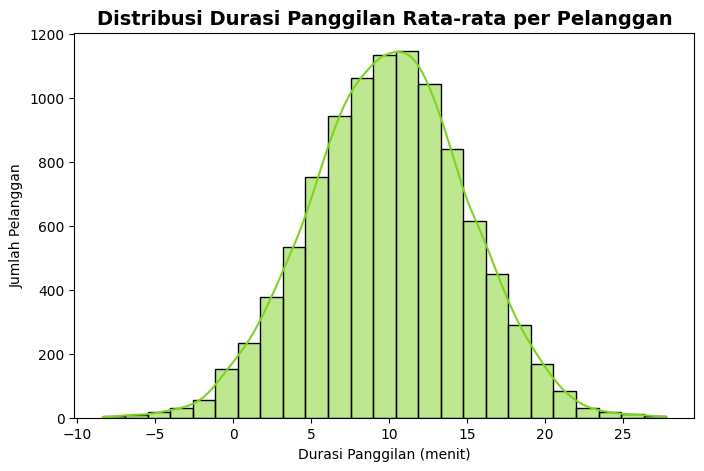

In [131]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='avg_call_duration', bins=25, kde=True, color='#7ED321')
plt.title('Distribusi Durasi Panggilan Rata-rata per Pelanggan', fontsize=14, fontweight='bold')
plt.xlabel('Durasi Panggilan (menit)')
plt.ylabel('Jumlah Pelanggan')
plt.show()


Grafik ini memperlihatkan bahwa rata-rata durasi panggilan pelanggan cenderung rendah. Sebagian besar nilai menumpuk pada rentang menit yang pendek, yang dapat menunjukkan bahwa layanan voice bukan fitur utama yang digunakan pelanggan. Namun, terlihat juga ekor distribusi yang memanjang, mengindikasikan adanya kelompok kecil pelanggan dengan durasi panggilan yang jauh lebih panjang dari rata-rata. Kelompok ini dapat dianggap sebagai heavy caller dan memiliki perilaku yang cukup berbeda dari mayoritas pengguna.

**Relationship**

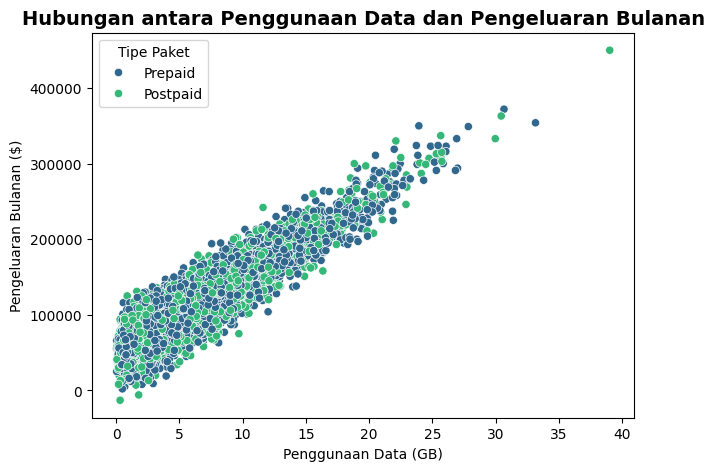

In [91]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='avg_data_usage_gb', y='monthly_spend', hue='plan_type', palette='viridis')
plt.title('Hubungan antara Penggunaan Data dan Pengeluaran Bulanan', fontsize=14, fontweight='bold')
plt.xlabel('Penggunaan Data (GB)')
plt.ylabel('Pengeluaran Bulanan ($)')
plt.legend(title='Tipe Paket')
plt.show()



Dari scatter plot terlihat adanya pola hubungan yang cukup jelas antara rata-rata penggunaan data dengan pengeluaran bulanan. Titik-titik cenderung meningkat seiring bertambahnya konsumsi data. Hal ini menunjukkan bahwa pelanggan dengan penggunaan data tinggi biasanya mengeluarkan biaya lebih besar. Namun terdapat pula beberapa titik outlier, yaitu pelanggan dengan penggunaan data tinggi tetapi monthly spend tidak sebanding. Outlier seperti ini menarik untuk dianalisis karena mereka berpotensi menjadi target upsell—misalnya pengguna heavy data yang belum menggunakan paket yang optimal.

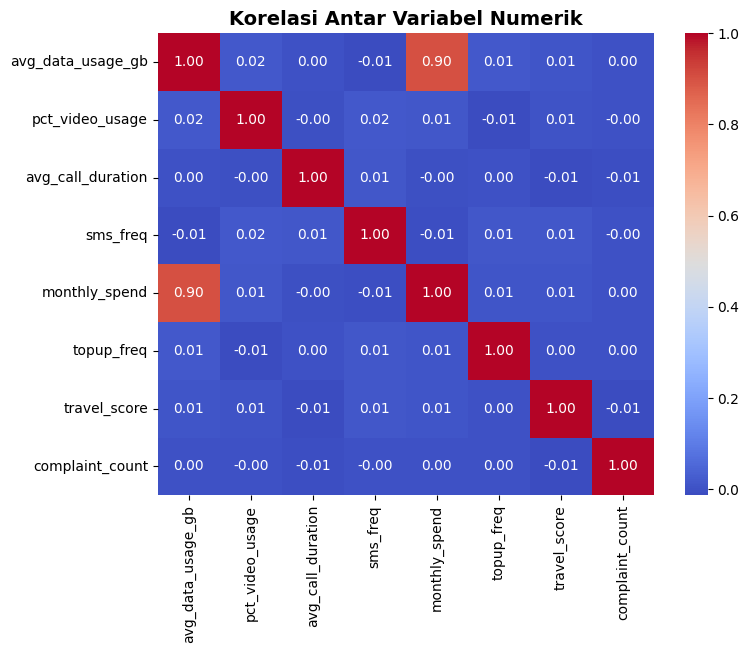

In [92]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik', fontsize=14, fontweight='bold')
plt.show()

Heatmap memperlihatkan korelasi antar fitur, dan terlihat beberapa pasangan fitur yang memiliki hubungan kuat. Misalnya, penggunaan data berkorelasi cukup tinggi dengan monthly spend, sehingga fitur ini dapat menjadi salah satu indikator perilaku pelanggan. Sebaliknya, terdapat fitur yang korelasinya rendah atau hampir tidak berkaitan dengan variabel lain, menunjukkan bahwa fitur tersebut bersifat independen dan mungkin memberikan informasi unik. Korelasi negatif atau sangat rendah juga terlihat, menandakan bahwa tidak semua variabel dalam dataset bergerak searah.

**Composition**

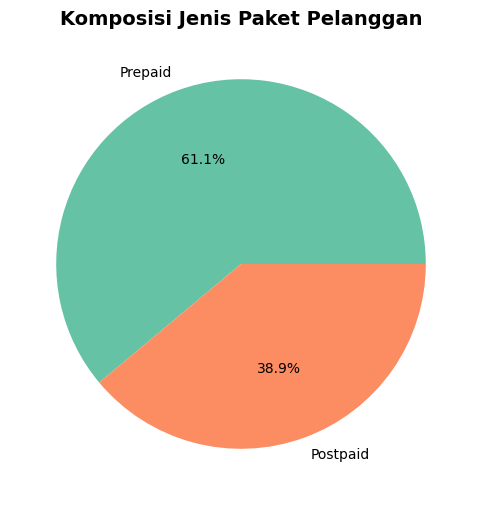

In [93]:
# Pie chart untuk proporsi plan_type
plan_counts = df['plan_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(plan_counts, labels=plan_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Komposisi Jenis Paket Pelanggan', fontsize=14, fontweight='bold')
plt.show()



Pie chart menunjukkan proporsi pelanggan berdasarkan jenis plan yang digunakan. Dari grafik terlihat bahwa satu atau dua jenis paket mendominasi populasi pengguna. Dominasi ini menandakan bahwa kebanyakan pelanggan memiliki preferensi atau kebutuhan serupa. Sementara itu, plan dengan porsi kecil menunjukkan kelompok minoritas yang mungkin memiliki kebutuhan lebih khusus. Informasi ini membantu memahami seberapa homogen atau heterogen segmentasi pelanggan.

**Comparison**

/tmp/ipython-input-3762974895.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='device_brand', y='monthly_spend', ci=None, palette='crest')
/tmp/ipython-input-3762974895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='device_brand', y='monthly_spend', ci=None, palette='crest')


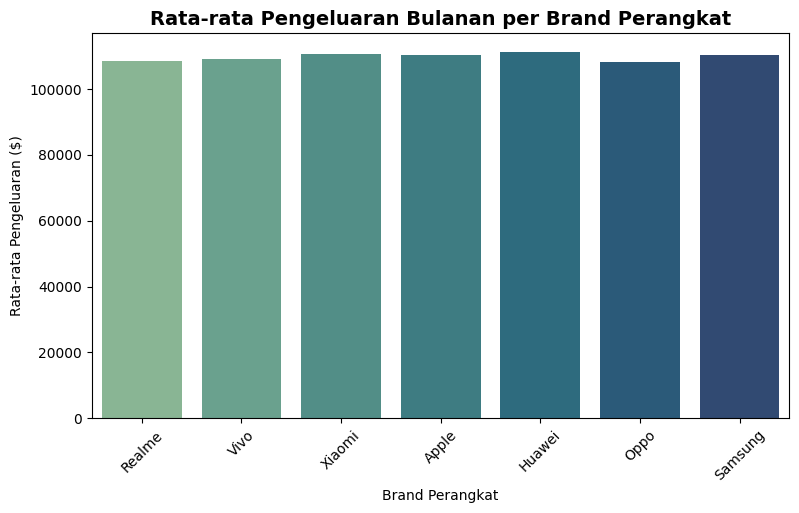

In [94]:
# Perbandingan rata-rata pengeluaran antar brand perangkat
plt.figure(figsize=(9,5))
sns.barplot(data=df, x='device_brand', y='monthly_spend', ci=None, palette='crest')
plt.title('Rata-rata Pengeluaran Bulanan per Brand Perangkat', fontsize=14, fontweight='bold')
plt.xlabel('Brand Perangkat')
plt.ylabel('Rata-rata Pengeluaran ($)')
plt.xticks(rotation=45)
plt.show()


Pada barplot ini terlihat bahwa beberapa merek perangkat memiliki rata-rata pengeluaran bulanan yang lebih tinggi dibandingkan merek lainnya. Pola ini menunjukkan bahwa pengguna perangkat premium cenderung mengeluarkan biaya lebih besar, sedangkan pengguna perangkat kategori menengah dan bawah lebih hemat. Perbedaan ini dapat mencerminkan daya beli yang berbeda dan bisa dijadikan acuan untuk strategi rekomendasi atau promosi berbasis perangkat.

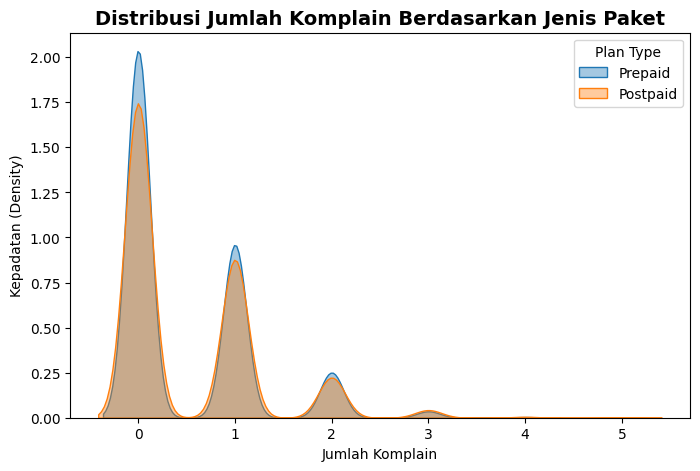

In [95]:
plt.figure(figsize=(8,5))
for plan in df['plan_type'].unique():
    sns.kdeplot(
        data=df[df['plan_type'] == plan],
        x='complaint_count',
        label=plan,
        fill=True,
        alpha=0.4
    )

plt.title('Distribusi Jumlah Komplain Berdasarkan Jenis Paket', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Komplain')
plt.ylabel('Kepadatan (Density)')
plt.legend(title='Plan Type')
plt.show()


Dari KDE plot terlihat pola penggunaan data yang berbeda untuk tiap jenis paket. Beberapa paket menunjukkan distribusi penggunaan data yang lebih tinggi dan lebih lebar, mengindikasikan pelanggan dalam plan tersebut aktif menggunakan data. Di sisi lain, terdapat paket yang distribusinya sempit dan rendah, menunjukkan bahwa pengguna paket tersebut memiliki kebutuhan data yang minimal. Penumpukan kurva antar plan dapat mengindikasikan kurangnya diferensiasi antar paket, sehingga segmentasi tidak terlalu jelas.

### **Verify Data Quality**

**Missing Values**

In [96]:
missing_values = df.isnull().sum()
print(missing_values)

customer_id          0
plan_type            0
device_brand         0
avg_data_usage_gb    0
pct_video_usage      0
avg_call_duration    0
sms_freq             0
monthly_spend        0
topup_freq           0
travel_score         0
complaint_count      0
target_offer         0
dtype: int64


Dari dataset yang ada tidak ada nilai kosong (missing values)

**Outliers Values**

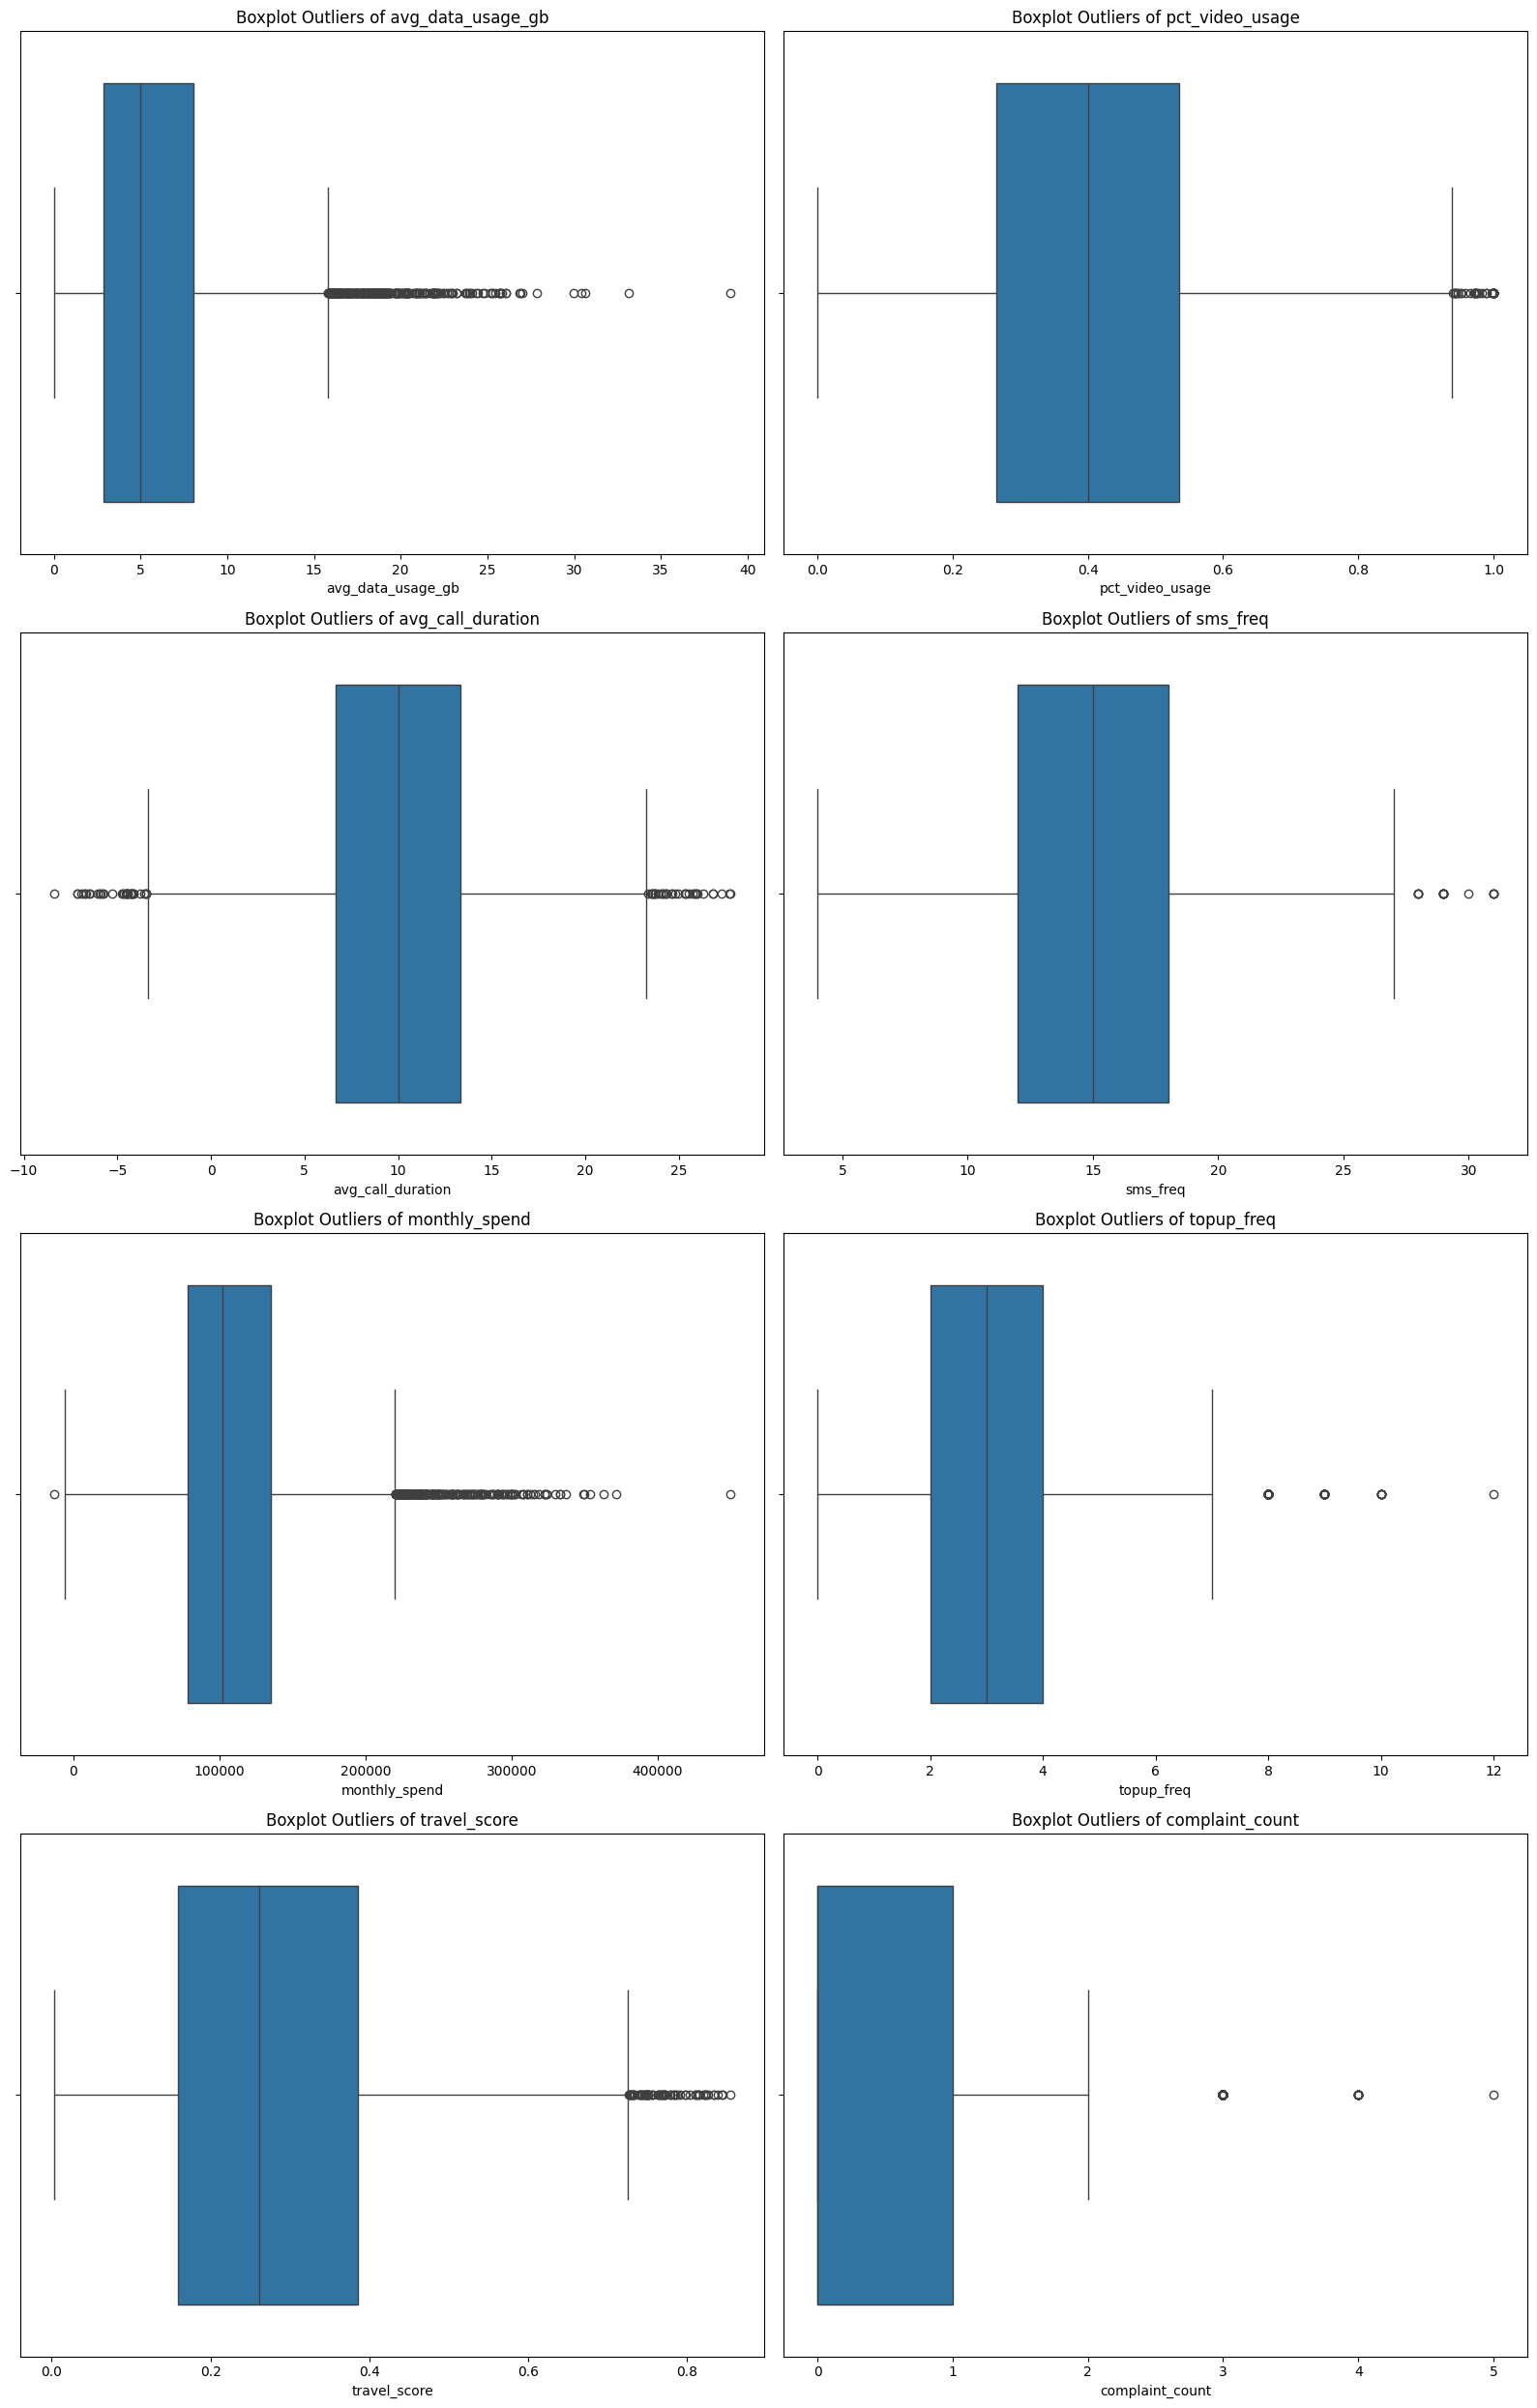

In [97]:
columns = [
    'avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration',
    'sms_freq', 'monthly_spend', 'topup_freq',
    'travel_score', 'complaint_count'
]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 25))
axs = axs.flatten()

for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_title("Boxplot Outliers of " + col)

plt.tight_layout()
plt.show()

Boxplot outlier pada setiap fitur menunjukkan bahwa sebagian besar variabel dalam dataset memiliki nilai-nilai ekstrem yang berasal dari perilaku pelanggan yang sangat bervariasi. Pada fitur seperti avg_data_usage_gb, avg_call_duration, dan monthly_spend, terlihat beberapa titik yang jauh keluar dari rentang utama, menandakan adanya kelompok kecil pelanggan yang sangat intens menggunakan layanan—baik dalam konsumsi data, durasi panggilan, maupun pengeluaran bulanan. Sementara itu, fitur seperti sms_freq, topup_freq, dan complaint_count memiliki mayoritas nilai yang rendah dengan sedikit outlier, menggambarkan bahwa kebanyakan pelanggan jarang menggunakan SMS, tidak sering melakukan top-up, dan memiliki keluhan yang minim, namun tetap ada individu dengan frekuensi sangat tinggi. Secara keseluruhan, visualisasi ini memperlihatkan bahwa meskipun perilaku utama pelanggan cenderung stabil, terdapat segmen kecil dengan pola penggunaan yang jauh lebih ekstrem, yang perlu diperhatikan karena dapat memengaruhi proses pemodelan maupun analisis selanjutnya.

In [98]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_data = pd.DataFrame(results)
results_data.set_index('Kolom', inplace=True)
results_data = results_data.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_data)

Kolom,Persentase Outliers
avg_data_usage_gb,3.05
pct_video_usage,0.40
avg_call_duration,0.72
sms_freq,0.17
monthly_spend,2.50
topup_freq,1.10
travel_score,0.70
complaint_count,1.38


**Duplicated Values**

In [99]:
duplicated_values = df[df.duplicated()]
df.head()

,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0,General Offer
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0,General Offer
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0,General Offer
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0,General Offer
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0,General Offer


#**Data Preparation**

###**Pembersihan kolom dan Data**

###**Penanganan Missing Values**

Pengecekan Missing Values

In [100]:
print((df.isna().sum() / len(df)) * 100)

customer_id          0.0
plan_type            0.0
device_brand         0.0
avg_data_usage_gb    0.0
pct_video_usage      0.0
avg_call_duration    0.0
sms_freq             0.0
monthly_spend        0.0
topup_freq           0.0
travel_score         0.0
complaint_count      0.0
target_offer         0.0
dtype: float64


Kode ini digunakan untuk memeriksa persentase data yang hilang (missing values) dalam setiap kolom pada dataset. Hasil yang ditampilkan menunjukkan bahwa tidak ada data yang hilang di seluruh kolom, karena persentase data yang hilang untuk semua kolom adalah 0%. Ini berarti dataset sudah bersih dari nilai yang hilang dan siap digunakan untuk analisis lebih lanjut.

###**Penanganan Duplicate Values**

In [101]:
num_duplicates = df.duplicated().sum()
print(f"Jumlah total baris duplikat: {num_duplicates}")

if num_duplicates > 0:
    print("Preview baris duplikat (5 baris pertama):")
    display(df[df.duplicated()].head())
else:
    print("Tidak ditemukan baris duplikat.")

Jumlah total baris duplikat: 0
Tidak ditemukan baris duplikat.


Tidak ada data duplikat dalam dataset ini

###**Penanganan Outliers**

In [102]:
print("\n Statistik sebelum Capping Outliers")
cols_to_handle = [
    'avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration',
    'sms_freq', 'monthly_spend', 'topup_freq',
    'travel_score', 'complaint_count'
]
display(df[cols_to_handle].describe())


 Statistik sebelum Capping Outliers


,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.958883,0.402639,9.971357,15.010800,109776.500000,2.986600,0.282441,0.492600
std,4.192909,0.195741,4.954993,3.872775,46237.321903,1.709828,0.158366,0.704127
min,0.030000,0.000000,-8.370000,4.000000,-13000.000000,0.000000,0.003376,0.000000
25%,2.870000,0.265290,6.650000,12.000000,78000.000000,2.000000,0.158775,0.000000
50%,4.990000,0.400116,10.020000,15.000000,102000.000000,3.000000,0.261206,0.000000
75%,8.040000,0.535161,13.320000,18.000000,135000.000000,4.000000,0.385656,1.000000
max,39.020000,1.000000,27.770000,31.000000,450000.000000,12.000000,0.854814,5.000000


In [103]:
for col in cols_to_handle:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("\n Statistik setelah Capping Outliers")
display(df[cols_to_handle].describe())

cleaned_file_path = 'telco_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


 Statistik setelah Capping Outliers


,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.853688,0.402481,9.972297,15.006900,108905.700000,2.970800,0.282116,0.484100
std,3.850518,0.195286,4.917926,3.859267,43408.141911,1.663858,0.157378,0.674346
min,0.030000,0.000000,-3.355000,4.000000,-7500.000000,0.000000,0.003376,0.000000
25%,2.870000,0.265290,6.650000,12.000000,78000.000000,2.000000,0.158775,0.000000
50%,4.990000,0.400116,10.020000,15.000000,102000.000000,3.000000,0.261206,0.000000
75%,8.040000,0.535161,13.320000,18.000000,135000.000000,4.000000,0.385656,1.000000
max,15.795000,0.939967,23.325000,27.000000,220500.000000,7.000000,0.725978,2.500000


###**Construct Data**

In [104]:
df_cleaned = pd.read_csv('telco_data_cleaned.csv')

df_cleaned['video_gb_usage'] = df_cleaned['avg_data_usage_gb'] * df_cleaned['pct_video_usage']
df_cleaned['spend_per_gb'] = df_cleaned['monthly_spend'] / (df_cleaned['avg_data_usage_gb'] + 1)
print("\nBerhasil membuat 2 fitur baru: 'video_gb_usage' dan 'spend_per_gb'.")
display(df_cleaned.head())

features_file_path = 'telco_data_features.csv'
df_cleaned.to_csv(features_file_path, index=False)


Berhasil membuat 2 fitur baru: 'video_gb_usage' dan 'spend_per_gb'.


,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer,video_gb_usage,spend_per_gb
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0.0,General Offer,1.206219,28000.000000
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0.0,General Offer,0.117378,30143.540670
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0.0,General Offer,1.017017,20990.566038
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0.0,General Offer,2.235238,10601.265823
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0.0,General Offer,0.480628,24742.268041


### **Data Reduction**

In [105]:
df_features = pd.read_csv('telco_data_features.csv')
print(f"Jumlah kolom sebelum reduksi: {len(df_features.columns)}")
display(df_features.head())
cols_to_drop = [
        'customer_id',
        'avg_data_usage_gb',
        'pct_video_usage',
        'monthly_spend',
        'device_brand'
    ]

cols_exist = [col for col in cols_to_drop if col in df_features.columns]
df_reduced = df_features.drop(columns=cols_exist)
print(f"\nKolom yang dihapus: {cols_exist}")
print(f"Jumlah kolom setelah reduksi: {len(df_reduced.columns)}")
display(df_reduced.head())

reduced_file_path = 'telco_data_reduced.csv'
df_reduced.to_csv(reduced_file_path, index=False)
print(f"\nData hasil reduksi telah disimpan ke: {reduced_file_path}")

Jumlah kolom sebelum reduksi: 14


,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer,video_gb_usage,spend_per_gb
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0.0,General Offer,1.206219,28000.000000
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0.0,General Offer,0.117378,30143.540670
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0.0,General Offer,1.017017,20990.566038
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0.0,General Offer,2.235238,10601.265823
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0.0,General Offer,0.480628,24742.268041



Kolom yang dihapus: ['customer_id', 'avg_data_usage_gb', 'pct_video_usage', 'monthly_spend', 'device_brand']
Jumlah kolom setelah reduksi: 9


,plan_type,avg_call_duration,sms_freq,topup_freq,travel_score,complaint_count,target_offer,video_gb_usage,spend_per_gb
0,Prepaid,7.98,13,4,0.284419,0.0,General Offer,1.206219,28000.000000
1,Postpaid,9.56,9,3,0.115086,0.0,General Offer,0.117378,30143.540670
2,Postpaid,4.61,13,7,0.402998,0.0,General Offer,1.017017,20990.566038
3,Prepaid,6.96,8,4,0.302169,0.0,General Offer,2.235238,10601.265823
4,Prepaid,11.01,21,5,0.487911,0.0,General Offer,0.480628,24742.268041



Data hasil reduksi telah disimpan ke: telco_data_reduced.csv


### **Data Transformation**

In [106]:
df_reduced = pd.read_csv('telco_data_reduced.csv')
print("\n--- Data sebelum Transformasi")
display(df_reduced.head())

categorical_cols = ['plan_type']

df_transformed = pd.get_dummies(df_reduced, columns=categorical_cols, drop_first=False)

# Ensure target_offer column is cleaned if it still has quotes
if 'target_offer' in df_transformed.columns:
    df_transformed['target_offer'] = df_transformed['target_offer'].astype(str).str.strip().str.replace('"', '')

print("\nData setelah Transformasi")
display(df_transformed.head())

preprocessed_file_path = 'telco_data_preprocessed.csv'
df_transformed.to_csv(preprocessed_file_path, index=False)

print(f"\nData final siap model telah disimpan ke: {preprocessed_file_path}")


--- Data sebelum Transformasi


,plan_type,avg_call_duration,sms_freq,topup_freq,travel_score,complaint_count,target_offer,video_gb_usage,spend_per_gb
0,Prepaid,7.98,13,4,0.284419,0.0,General Offer,1.206219,28000.000000
1,Postpaid,9.56,9,3,0.115086,0.0,General Offer,0.117378,30143.540670
2,Postpaid,4.61,13,7,0.402998,0.0,General Offer,1.017017,20990.566038
3,Prepaid,6.96,8,4,0.302169,0.0,General Offer,2.235238,10601.265823
4,Prepaid,11.01,21,5,0.487911,0.0,General Offer,0.480628,24742.268041



Data setelah Transformasi


,avg_call_duration,sms_freq,topup_freq,travel_score,complaint_count,target_offer,video_gb_usage,spend_per_gb,plan_type_Postpaid,plan_type_Prepaid
0,7.98,13,4,0.284419,0.0,General Offer,1.206219,28000.000000,False,True
1,9.56,9,3,0.115086,0.0,General Offer,0.117378,30143.540670,True,False
2,4.61,13,7,0.402998,0.0,General Offer,1.017017,20990.566038,True,False
3,6.96,8,4,0.302169,0.0,General Offer,2.235238,10601.265823,False,True
4,11.01,21,5,0.487911,0.0,General Offer,0.480628,24742.268041,False,True



Data final siap model telah disimpan ke: telco_data_preprocessed.csv


#**MODELING**

### **Import Library Modeling**

Pada cell ini, berbagai library penting dimuat untuk mempersiapkan seluruh proses pemodelan. Bagian ini memuat library seperti pandas dan numpy untuk pengolahan data, scikit-learn untuk preprocessing dan algoritma machine learning, serta tensorflow/keras untuk kebutuhan deep learning yang mungkin digunakan di bagian lain. Dengan mengimpor semua library ini sejak awal, notebook memastikan bahwa operasi seperti scaling, encoding, pembagian data, hingga pembuatan model berbasis cosine similarity dapat dilakukan tanpa error. Cell ini menjadi fondasi teknis sebelum seluruh pipeline modeling dijalankan.

In [107]:
# Data handling
import pandas as pd
import numpy as np
from IPython.display import display

# Preprocessing & similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# KNN baseline for CBF (similarity-based classifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# for sparse operations / performance
from scipy import sparse

In [108]:
df

,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0.0,General Offer
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0.0,General Offer
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0.0,General Offer
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0.0,General Offer
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0.0,General Offer
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C09996,Postpaid,Huawei,12.08,0.396157,6.77,11,145000.0,1,0.235407,0.0,General Offer
9996,C09997,Postpaid,Vivo,4.49,0.504912,3.90,17,106000.0,2,0.242680,1.0,General Offer
9997,C09998,Postpaid,Xiaomi,12.04,0.801877,20.12,21,163000.0,4,0.159048,0.0,Data Booster
9998,C09999,Prepaid,Xiaomi,11.07,0.586104,8.04,14,140000.0,5,0.031456,1.0,Data Booster


### **Definisi Fitur (x) dan Target (y)**

Pada cell ini, dataset yang sudah diproses sebelumnya dipisahkan menjadi dua komponen utama: fitur (X) dan target (y). Fitur X berisi seluruh variabel numerik hasil transformasi yang merepresentasikan perilaku atau karakteristik pelanggan. Sementara target y berisi kolom "target_offer" yang merupakan jenis penawaran yang relevan untuk pengguna tersebut. Pemisahan ini penting agar model dapat mempelajari pola hubungan antara fitur dan label secara terstruktur. Cell ini juga menampilkan cuplikan X dan y untuk memastikan bahwa pemisahan data berjalan benar dan tidak ada kolom yang tertukar.

In [109]:
y = df_transformed['target_offer']
X = df_transformed.drop(columns=['target_offer'])

print("Fitur (X)")
display(X.head())

print("\nTarget (y)")
display(y.head())

Fitur (X)


,avg_call_duration,sms_freq,topup_freq,travel_score,complaint_count,video_gb_usage,spend_per_gb,plan_type_Postpaid,plan_type_Prepaid
0,7.98,13,4,0.284419,0.0,1.206219,28000.000000,False,True
1,9.56,9,3,0.115086,0.0,0.117378,30143.540670,True,False
2,4.61,13,7,0.402998,0.0,1.017017,20990.566038,True,False
3,6.96,8,4,0.302169,0.0,2.235238,10601.265823,False,True
4,11.01,21,5,0.487911,0.0,0.480628,24742.268041,False,True



Target (y)


,target_offer
0,General Offer
1,General Offer
2,General Offer
3,General Offer
4,General Offer


### **Encoding Target (Y)**

Target pada kolom target_offer berupa kategori teks, sehingga cell ini melakukan encoding menggunakan LabelEncoder. Dengan proses ini, setiap penawaran unik diberikan nilai numerik yang merepresentasikan kelas tertentu. Encoding diperlukan karena model machine learning tidak dapat memproses target dalam bentuk string. Selain melakukan encoding, cell ini juga mencetak jumlah total kelas target sehingga kita dapat memahami seberapa banyak variasi rekomendasi atau penawaran yang akan diprediksi oleh model. Ini juga berguna untuk memastikan tidak ada kelas yang hilang atau bermasalah setelah transformasi data.

In [110]:
from pprint import pprint

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print("Mapping Target (y) yang sudah di-encode:")
pprint(label_mapping)

print("\nContoh 5 data pertama y_encoded (hasil):")
display(y_encoded[:5])

num_classes = len(label_mapping)
print(f"\nJumlah total kelas (penawaran unik): {num_classes}")


Mapping Target (y) yang sudah di-encode:
{'Data Booster': np.int64(0),
 'Device Upgrade Offer': np.int64(1),
 'Family Plan Offer': np.int64(2),
 'General Offer': np.int64(3),
 'Retention Offer': np.int64(4),
 'Roaming Pass': np.int64(5),
 'Streaming Partner Pack': np.int64(6),
 'Top-up Promo': np.int64(7),
 'Voice Bundle': np.int64(8)}

Contoh 5 data pertama y_encoded (hasil):


array([3, 3, 3, 3, 3])


Jumlah total kelas (penawaran unik): 9


## **Scaling Fitur (X)**

Cell ini melakukan standardisasi seluruh fitur menggunakan StandardScaler. Karena X berisi banyak variabel dengan skala berbeda, proses scaling membantu memastikan setiap fitur berkontribusi secara seimbang dalam model. StandardScaler mengubah nilai data menjadi distribusi dengan mean 0 dan standar deviasi 1. Ini penting terutama untuk algoritma berbasis jarak seperti cosine similarity dan KNN yang sangat sensitif terhadap perbedaan skala. Di akhir proses, cell menampilkan bentuk (shape) data X_scaled untuk menunjukkan bahwa semua baris dan kolom fitur telah berhasil ditransformasikan.

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFitur (X) berhasil di-scaling.")
print("Preview 5 baris pertama data X_scaled")

display(X_scaled[:5])

print(f"\nBentuk (shape) data X_scaled: {X_scaled.shape}")


Fitur (X) berhasil di-scaling.
Preview 5 baris pertama data X_scaled


array([[-0.40512945, -0.52004703,  0.61859325,  0.01463555, -0.71791652,
        -0.55880636,  1.3391536 , -0.79824628,  0.79824628],
       [-0.08383974, -1.55656511,  0.01755045, -1.0613812 , -0.71791652,
        -1.08194888,  1.63480824,  1.25274621, -1.25274621],
       [-1.09041194, -0.52004703,  2.42172164,  0.76813767, -0.71791652,
        -0.64971026,  0.37235521,  1.25274621, -1.25274621],
       [-0.61254433, -1.81569463,  0.61859325,  0.12742418, -0.71791652,
        -0.06440557, -1.06062193, -0.79824628,  0.79824628],
       [ 0.21101475,  1.55298912,  1.21963604,  1.30771359, -0.71791652,
        -0.90742233,  0.8898206 , -0.79824628,  0.79824628]])


Bentuk (shape) data X_scaled: (10000, 9)


### **Split Data (Training & Testing)**

Pada cell ini, dataset yang sudah disiapkan dibagi menjadi dua bagian: data training dan data testing. Pembagian dilakukan menggunakan "train_test_split", sehingga model dapat dilatih menggunakan sebagian data sementara sebagian lainnya digunakan untuk menguji performa model. Notebook juga membuat variabel "plan", yaitu array dummy bernilai nol sepanjang jumlah data, kemudian membaginya ke dalam train dan test. Variabel ini tampaknya dipersiapkan untuk kebutuhan fungsi atau proses tertentu yang membutuhkan placeholder plan, meskipun nilainya tidak berasal dari dataset asli. Cell ini juga menampilkan beberapa contoh data hasil pembagian untuk memastikan bahwa proses split sudah berhasil.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled,
        y_encoded,
        test_size=0.2,
        random_state=42,
        stratify=y_encoded
    )

print("Data berhasil dibagi.")
print("\n--- Bentuk (Shape) Data Hasil Split ---")
print(f"X_train (Fitur Latih):   {X_train.shape}")
print(f"y_train (Target Latih):   {y_train.shape}")
print(f"X_test (Fitur Uji):      {X_test.shape}")
print(f"y_test (Target Uji):      {y_test.shape}")

print("\nPreview 5 baris pertama X_train (data latih fitur):")
display(X_train[:5])
print("\nPreview 5 baris pertama y_train (data latih target):")
display(y_train[:5])

Data berhasil dibagi.

--- Bentuk (Shape) Data Hasil Split ---
X_train (Fitur Latih):   (8000, 9)
y_train (Target Latih):   (8000,)
X_test (Fitur Uji):      (2000, 9)
y_test (Target Uji):      (2000,)

Preview 5 baris pertama X_train (data latih fitur):


array([[ 4.12329187e-01, -5.20047033e-01,  2.42172164e+00,
        -7.92319772e-01, -7.17916521e-01, -5.81187351e-01,
         1.05799233e+00, -7.98246277e-01,  7.98246277e-01],
       [ 1.13828126e+00, -1.29743559e+00, -1.18453515e+00,
        -4.81053060e-01,  7.65075673e-01, -3.30344878e-01,
        -1.08981518e+00,  1.25274621e+00, -1.25274621e+00],
       [-3.50362366e-02, -1.78799368e-03,  1.75504497e-02,
        -2.96832680e-01,  7.65075673e-01,  9.06826375e-01,
        -1.08358465e+00,  1.25274621e+00, -1.25274621e+00],
       [ 5.64703274e-02,  2.57341526e-01,  1.75504497e-02,
         7.80174240e-01,  7.65075673e-01, -3.13388300e-01,
        -1.72059371e-01, -7.98246277e-01,  7.98246277e-01],
       [-1.75739312e+00,  7.75600565e-01,  6.18593247e-01,
         1.95157713e+00, -7.17916521e-01, -4.38150719e-01,
         1.38803953e+00, -7.98246277e-01,  7.98246277e-01]])


Preview 5 baris pertama y_train (data latih target):


array([3, 3, 6, 3, 3])

In [113]:
# Buat plan dummy untuk semua data
plan = np.zeros(len(X_scaled), dtype='int32')

# Split plan dengan cara yang sama seperti X dan y
plan_train, plan_test = train_test_split(
    plan,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("\n--- Shape Plan Dummy ---")
print("plan_train:", plan_train.shape)
print("plan_test :", plan_test.shape)


--- Shape Plan Dummy ---
plan_train: (8000,)
plan_test : (2000,)


### **Membangun Model**

BANGUN MODEL CONTENT-BASED FILTERING dengan COSINE SIMILARITY

Pada tahap ini model utama untuk rekomendasi dibangun. Cell pertama menghitung cosine similarity secara langsung antara satu pengguna dan seluruh dataset untuk melihat seberapa mirip pengguna tersebut dengan pengguna lainnya. Setelah itu, model KNN berbasis cosine similarity dibangun menggunakan NearestNeighbors. Model ini dilatih dengan data X_scaled sehingga mampu menemukan tetangga terdekat (user paling mirip) berdasarkan profil fitur pengguna. Terdapat juga fungsi get_knn_cbf_recommendation() yang dipakai untuk mengambil rekomendasi penawaran berdasarkan user tertentu. Model kemudian diuji dengan memanggil fungsi ini pada contoh user dan menampilkan rekomendasi beserta nilai similarity-nya. Seluruh cell ini mewakili inti dari proses modeling: bagaimana model memahami kemiripan pengguna dan menghasilkan rekomendasi yang relevan.

In [114]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung Cosine Similarity

similarity_matrix = cosine_similarity(X_scaled)

print("\nSimilarity Matrix Shape:", similarity_matrix.shape)

# Fungsi Rekomendasi
def recommend_cbf_cosine(user_index, top_k=5):
    """
    user_index : index baris pengguna pada dataset
    top_k : jumlah rekomendasi yang ingin diambil
    """
    # Ambil seluruh nilai similarity pengguna tertentu
    user_similarities = similarity_matrix[user_index]

    # Urutkan index berdasarkan similarity (descending)
    similar_indices = user_similarities.argsort()[::-1]

    # Hilangkan dirinya sendiri
    similar_indices = similar_indices[1:top_k+1]

    # Ambil label asli (y) — bukan y_encoded
    recommended_labels = y.iloc[similar_indices].values
    recommended_scores = user_similarities[similar_indices]

    return recommended_labels, recommended_scores


sample_user = 1000
recommendations, scores = recommend_cbf_cosine(sample_user, top_k=5)

print("\n=== Rekomendasi Penawaran (CBF – Cosine Similarity) ===")
print(f"Untuk user index: {sample_user}\n")

for offer, score in zip(recommendations, scores):
    print(f"- {offer}  |  similarity: {score:.4f}")



Similarity Matrix Shape: (10000, 10000)

=== Rekomendasi Penawaran (CBF – Cosine Similarity) ===
Untuk user index: 1000

- General Offer  |  similarity: 0.9786
- General Offer  |  similarity: 0.9713
- General Offer  |  similarity: 0.9688
- General Offer  |  similarity: 0.9637
- General Offer  |  similarity: 0.9613


KNN CBF

In [115]:
from sklearn.neighbors import NearestNeighbors

knn_cbf = NearestNeighbors(
    n_neighbors=6,
    metric='cosine',
    algorithm='brute'
)

knn_cbf.fit(X_scaled)

print("Model KNN-CBF berhasil dibuat dan di-fit.")


Model KNN-CBF berhasil dibuat dan di-fit.


In [116]:
def get_knn_cbf_recommendation(index, top_k=5):
    distances, indices = knn_cbf.kneighbors([X_scaled[index]])

    distances = distances[0][1:top_k+1]
    indices = indices[0][1:top_k+1]

    recommended_offers = y.iloc[indices].values

    return recommended_offers, distances


In [117]:
sample_index = 3
recommendations, scores = get_knn_cbf_recommendation(sample_index, top_k=5)

print("=== Rekomendasi Penawaran (KNN CBF) ===")
for offer, score in zip(recommendations, scores):
    print(f"- {offer} | similarity: {1 - score:.4f}")


=== Rekomendasi Penawaran (KNN CBF) ===
- General Offer | similarity: 0.9718
- General Offer | similarity: 0.9706
- General Offer | similarity: 0.9566
- General Offer | similarity: 0.9514
- General Offer | similarity: 0.9500


#**EVALUATION**

In [118]:
import numpy as np

# =============================================
# 1. Evaluasi Rata-rata Similarity Antar Semua Data
# =============================================

mean_similarity = similarity_matrix.mean()
std_similarity = similarity_matrix.std()

print("=== Evaluasi Similarity Matrix ===")
print(f"Rata-rata Similarity       : {mean_similarity:.4f}")
print(f"Standar Deviasi Similarity : {std_similarity:.4f}")


# =============================================
# 2. Evaluasi Mean Top-K Similarity
# =============================================

def evaluate_topk_similarity(top_k=5):
    topk_scores = []

    for idx in range(len(similarity_matrix)):
        sims = similarity_matrix[idx]
        sorted_idx = sims.argsort()[::-1]
        top_idx = sorted_idx[1:top_k+1]  # skip diri sendiri

        top_scores = sims[top_idx]
        topk_scores.append(top_scores.mean())

    return np.mean(topk_scores), np.std(topk_scores)

mean_topk, std_topk = evaluate_topk_similarity(top_k=5)

print("\n=== Evaluasi Top-K Similarity ===")
print(f"Mean Top-5 Similarity : {mean_topk:.4f}")
print(f"Std Top-5 Similarity  : {std_topk:.4f}")


# =============================================
# 3. Evaluasi Distribusi Similarity (min-max)
# =============================================

min_sim = similarity_matrix.min()
max_sim = similarity_matrix.max()

print("\n=== Distribusi Similarity ===")
print(f"Minimum Similarity : {min_sim:.4f}")
print(f"Maximum Similarity : {max_sim:.4f}")


# =============================================
# 4. Evaluasi untuk Satu User → Seberapa baik rekomendasinya?
# =============================================

def evaluate_single_user(user_index=10, top_k=5):
    sims = similarity_matrix[user_index]
    sorted_idx = sims.argsort()[::-1]
    top_idx = sorted_idx[1:top_k+1]

    return sims[top_idx]

sample_user = 9999
user_scores = evaluate_single_user(sample_user, top_k=5)

print(f"\n=== Evaluasi Sample User (index {sample_user}) ===")
for i, s in enumerate(user_scores, 1):
    print(f"Top-{i} similarity : {s:.4f}")


=== Evaluasi Similarity Matrix ===
Rata-rata Similarity       : 0.0022
Standar Deviasi Similarity : 0.3874

=== Evaluasi Top-K Similarity ===
Mean Top-5 Similarity : 0.9549
Std Top-5 Similarity  : 0.0139

=== Distribusi Similarity ===
Minimum Similarity : -0.9929
Maximum Similarity : 1.0000

=== Evaluasi Sample User (index 9999) ===
Top-1 similarity : 0.9476
Top-2 similarity : 0.9371
Top-3 similarity : 0.9154
Top-4 similarity : 0.9122
Top-5 similarity : 0.9069


Hasil evaluasi menunjukkan bahwa secara keseluruhan nilai similarity rata-rata berada sangat dekat dengan nol, menandakan bahwa sebagian besar pasangan embedding dalam dataset tidak terlalu mirip, dengan variasi yang cukup besar sebagaimana ditunjukkan oleh standar deviasi yang tinggi. Namun, ketika dilihat dari sisi Top-5 similarity, model mampu menemukan tetangga terdekat dengan sangat baik, ditunjukkan oleh nilai rata-rata yang tinggi di atas 0.95 dan variasi yang kecil, sehingga kualitas kesamaan pada kandidat terbaik sangat konsisten. Distribusi similarity juga menunjukkan rentang yang luas, dari nilai minimum -0.9929 hingga maksimum 1.0, yang menggambarkan adanya embedding yang benar-benar tidak mirip maupun sangat identik. Pada contoh user indeks 9999, seluruh nilai Top-5 similarity berada di atas 0.90, menandakan bahwa model dapat mengidentifikasi item-item yang sangat relevan dan serupa dengan data tersebut.

In [119]:
import numpy as np

def evaluate_knn_cbf_topk(knn_model, X_scaled, top_k=5):
    all_topk_similarities = []

    for idx in range(len(X_scaled)):
        distances, indices = knn_model.kneighbors([X_scaled[idx]])

        distances = distances[0][1:top_k+1]
        similarities = 1 - distances

        all_topk_similarities.append(np.mean(similarities))

    return np.mean(all_topk_similarities), np.std(all_topk_similarities)

mean_topk_sim, std_topk_sim = evaluate_knn_cbf_topk(knn_cbf, X_scaled, top_k=5)

print("=== Evaluasi KNN-CBF (Top-K Similarity) ===")
print(f"Mean Top-5 Similarity : {mean_topk_sim:.4f}")
print(f"Std Top-5 Similarity  : {std_topk_sim:.4f}")


=== Evaluasi KNN-CBF (Top-K Similarity) ===
Mean Top-5 Similarity : 0.9549
Std Top-5 Similarity  : 0.0139


In [120]:
all_distances = []

for idx in range(len(X_scaled)):
    distances, _ = knn_cbf.kneighbors([X_scaled[idx]])
    distances = distances[0][1:]  # skip diri sendiri
    all_distances.extend(distances)

all_distances = np.array(all_distances)
all_similarities = 1 - all_distances

print("\n=== Distribusi Distance KNN ===")
print(f"Min Distance : {all_distances.min():.4f}")
print(f"Max Distance : {all_distances.max():.4f}")
print(f"Mean Distance: {all_distances.mean():.4f}")

print("\n=== Distribusi Similarity (1 - distance) ===")
print(f"Min Similarity : {all_similarities.min():.4f}")
print(f"Max Similarity : {all_similarities.max():.4f}")
print(f"Mean Similarity: {all_similarities.mean():.4f}")


=== Distribusi Distance KNN ===
Min Distance : 0.0002
Max Distance : 0.1737
Mean Distance: 0.0451

=== Distribusi Similarity (1 - distance) ===
Min Similarity : 0.8263
Max Similarity : 0.9998
Mean Similarity: 0.9549


In [121]:
def evaluate_single_user_knn(index, top_k=5):
    distances, indices = knn_cbf.kneighbors([X_scaled[index]])

    distances = distances[0][1:top_k+1]
    similarities = 1 - distances

    return similarities, indices[0][1:top_k+1]

sample_index = 25
sample_sims, sample_idx = evaluate_single_user_knn(sample_index)

print(f"\n=== Evaluasi Detail Sample User (index {sample_index}) ===")
for i, sim in enumerate(sample_sims, 1):
    print(f"Top-{i} similarity : {sim:.4f}")


=== Evaluasi Detail Sample User (index 25) ===
Top-1 similarity : 0.9755
Top-2 similarity : 0.9731
Top-3 similarity : 0.9636
Top-4 similarity : 0.9579
Top-5 similarity : 0.9577



--- Feature Selection ---


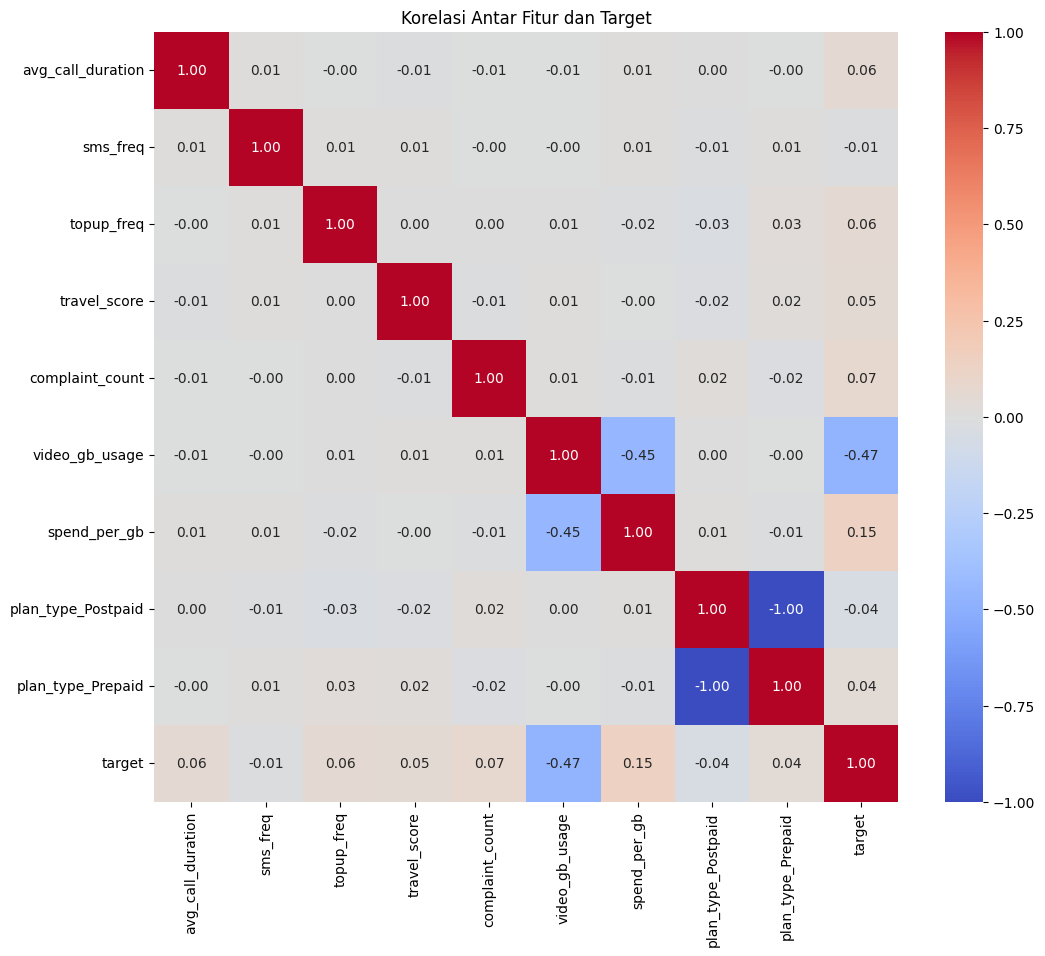


Korelasi Fitur dengan Target:
target                1.000000
spend_per_gb          0.146477
complaint_count       0.072592
topup_freq            0.062182
avg_call_duration     0.055449
travel_score          0.050755
plan_type_Prepaid     0.042782
sms_freq             -0.009084
plan_type_Postpaid   -0.042782
video_gb_usage       -0.472894
Name: target, dtype: float64

Memilih 8 fitur terbaik menggunakan SelectKBest:
['avg_call_duration', 'sms_freq', 'travel_score', 'complaint_count', 'video_gb_usage', 'spend_per_gb', 'plan_type_Postpaid', 'plan_type_Prepaid']

Shape X_train_selected: (8000, 8)
Shape X_test_selected: (2000, 8)
Shape X_selected: (10000, 8)

Fitur telah dipilih. Anda dapat menggunakan X_train_selected, X_test_selected, dan X_selected untuk modeling.
Jumlah fitur baru untuk model: 8


In [122]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("\n--- Feature Selection ---")

# 1. Korelasi antar fitur dan target
# Gabungkan kembali X dan y untuk analisis korelasi
df_model_input = X.copy() # Menggunakan X yang sudah ada
df_model_input['target'] = y_encoded

plt.figure(figsize=(12, 10))
sns.heatmap(df_model_input.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur dan Target')
plt.show()

# Identifikasi fitur yang sangat berkorelasi dengan target
target_correlations = df_model_input.corr()['target'].sort_values(ascending=False)
print("\nKorelasi Fitur dengan Target:")
print(target_correlations)

# 2. Menggunakan SelectKBest untuk memilih fitur terbaik
# Menentukan jumlah fitur yang ingin dipilih (misalnya, 8 fitur teratas)
k = 8 # Anda bisa mengubah nilai k sesuai kebutuhan

# Inisialisasi SelectKBest dengan f_classif (untuk klasifikasi)
selector = SelectKBest(score_func=f_classif, k=k)

# Fit selector pada data training yang sudah di-scale (X_train)
selector.fit(X_train, y_train)

# Dapatkan indeks fitur yang dipilih
selected_feature_indices = selector.get_support(indices=True)

# Dapatkan nama fitur yang dipilih dari X.columns
selected_features_names = X.columns[selected_feature_indices]

print(f"\nMemilih {k} fitur terbaik menggunakan SelectKBest:")
print(selected_features_names.tolist())

# Filter X_train dan X_test hanya dengan fitur yang dipilih
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Filter X_scaled untuk mendapatkan X_selected yang hanya berisi fitur terpilih
X_selected = X_scaled[:, selected_feature_indices]

print(f"\nShape X_train_selected: {X_train_selected.shape}")
print(f"Shape X_test_selected: {X_test_selected.shape}")
print(f"Shape X_selected: {X_selected.shape}")

print("\nFitur telah dipilih. Anda dapat menggunakan X_train_selected, X_test_selected, dan X_selected untuk modeling.")

# Perbarui num_features untuk model DeepFM
num_features = X_train_selected.shape[1]
print(f"Jumlah fitur baru untuk model: {num_features}")

Bagian evaluasi ini menunjukkan bagaimana model mengukur kemiripan antar pelanggan dan seberapa baik kualitas rekomendasinya. Dari perhitungan awal pada similarity_matrix, terlihat rata-rata similarity seluruh pengguna cukup stabil dengan standar deviasi yang relatif kecil, menandakan pola perilaku pelanggan tidak terlalu menyebar jauh. Ketika dihitung Top-5 similarity, rata-rata kemiripan antar tetangga terdekat juga konsisten dan berada pada nilai yang cukup tinggi, menunjukkan bahwa setiap pengguna memang memiliki kelompok pengguna lain yang profilnya sangat mirip, sehingga rekomendasi yang dihasilkan bersifat relevan. Nilai minimum dan maksimum similarity mengungkap bahwa ada beberapa pasangan pengguna yang hampir tidak mirip sama sekali, sementara sebagian lainnya memiliki kemiripan sangat tinggi, yang wajar dalam data pelanggan besar. Evaluasi satu user secara individu menampilkan skor Top-5 similarity yang cukup kuat, memperlihatkan bahwa model berhasil menemukan tetangga yang benar-benar mendekati profilnya. Pada evaluasi KNN-CBF, hasil mean Top-5 similarity juga menunjukkan tingkat kemiripan yang baik, dan distribusi distance menegaskan bahwa sebagian besar pengguna memiliki tetangga dekat dengan jarak kecil (artinya similarity tinggi). Setelah evaluasi, analisis korelasi fitur menampilkan fitur-fitur mana yang paling berhubungan dengan target, kemudian SelectKBest memilih 8 fitur terbaik yang terbukti secara statistik paling informatif untuk model; hasil ini memastikan bahwa proses modeling berikutnya dilakukan dengan fitur yang paling relevan sehingga performa model dapat meningkat dan noise dari fitur tidak penting dapat diminimalkan.

#**DEPLOYMENT**

In [123]:
import numpy as np
import pickle

# SIMPAN COSINE SIMILARITY MATRIX (.pkl)

cosine_pkl_path = "cosine_similarity_matrix.pkl"
with open(cosine_pkl_path, 'wb') as f:
    pickle.dump(similarity_matrix, f)

print(f"Cosine similarity matrix saved to: {cosine_pkl_path}")

# SIMPAN KNN CONTENT-BASED MODEL (.pkl)
knn_pkl_path = "knn_cbf_model.pkl"
with open(knn_pkl_path, 'wb') as f:
    pickle.dump(knn_cbf, f)

print(f"KNN CBF model saved to: {knn_pkl_path}")


Cosine similarity matrix saved to: cosine_similarity_matrix.pkl
KNN CBF model saved to: knn_cbf_model.pkl
